Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impoting file & data
df=pd.read_csv("avocado.csv")
df

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
#Checking the type of data
df.dtypes

Date             object
AveragePrice    float64
Total_Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge_Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
#Data Studying
df.head()

,Date,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory data analysis for better understaning & cleaning the data

In [5]:
#Checking the null value-No null value found 
df.isnull().sum()

Date            0
AveragePrice    0
Total_Volume    0
PLU_4046        0
PLU_4225        0
PLU_4770        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

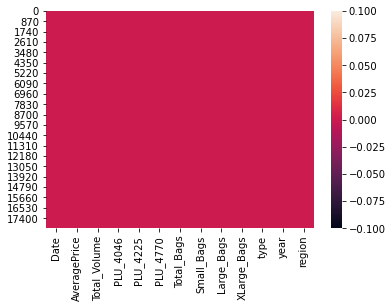

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

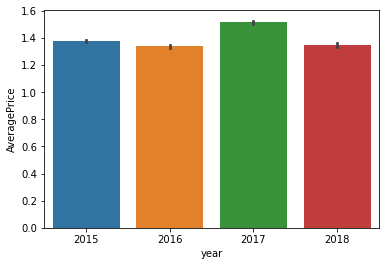

In [8]:
sns.barplot(x="year",y="AveragePrice",data=df)

<AxesSubplot:xlabel='year', ylabel='Total_Volume'>

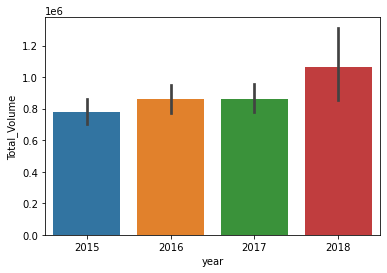

In [9]:
sns.barplot(x="year",y="Total_Volume",data=df)

<AxesSubplot:xlabel='Total_Volume', ylabel='region'>

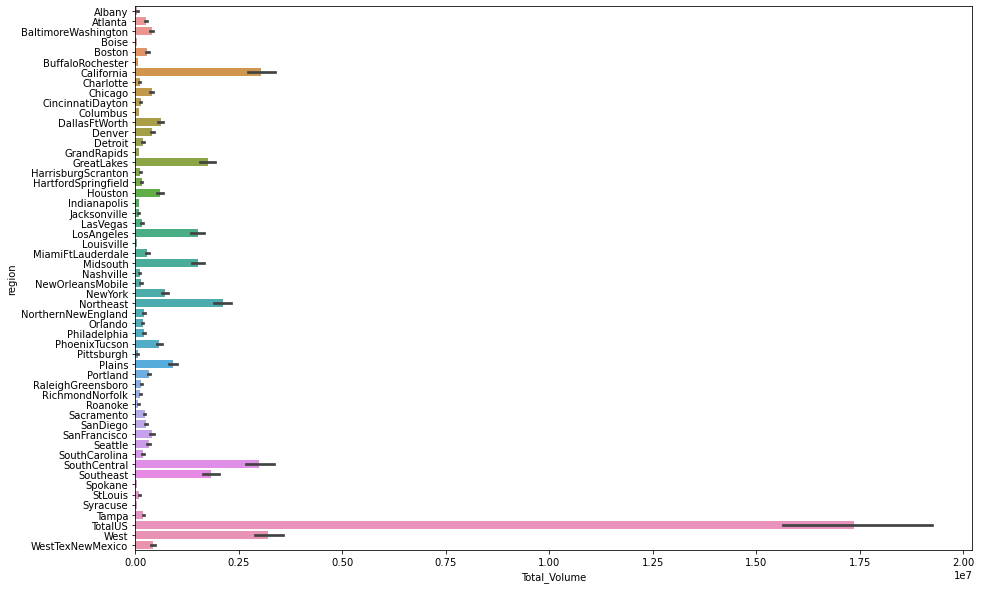

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(x="Total_Volume",y="region",orient="h",data=df)

#As we can see 
1.Average price of the avacado is maximum in the year 2017.
2.The total volume is of avaocado is maximum in the year 2018.
3. The avacado is used maximam in the total US. 

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total_Volume'}>,
        <AxesSubplot:title={'center':'PLU_4046'}>,
        <AxesSubplot:title={'center':'PLU_4225'}>],
       [<AxesSubplot:title={'center':'PLU_4770'}>,
        <AxesSubplot:title={'center':'Total_Bags'}>,
        <AxesSubplot:title={'center':'Small_Bags'}>,
        <AxesSubplot:title={'center':'Large_Bags'}>],
       [<AxesSubplot:title={'center':'XLarge_Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

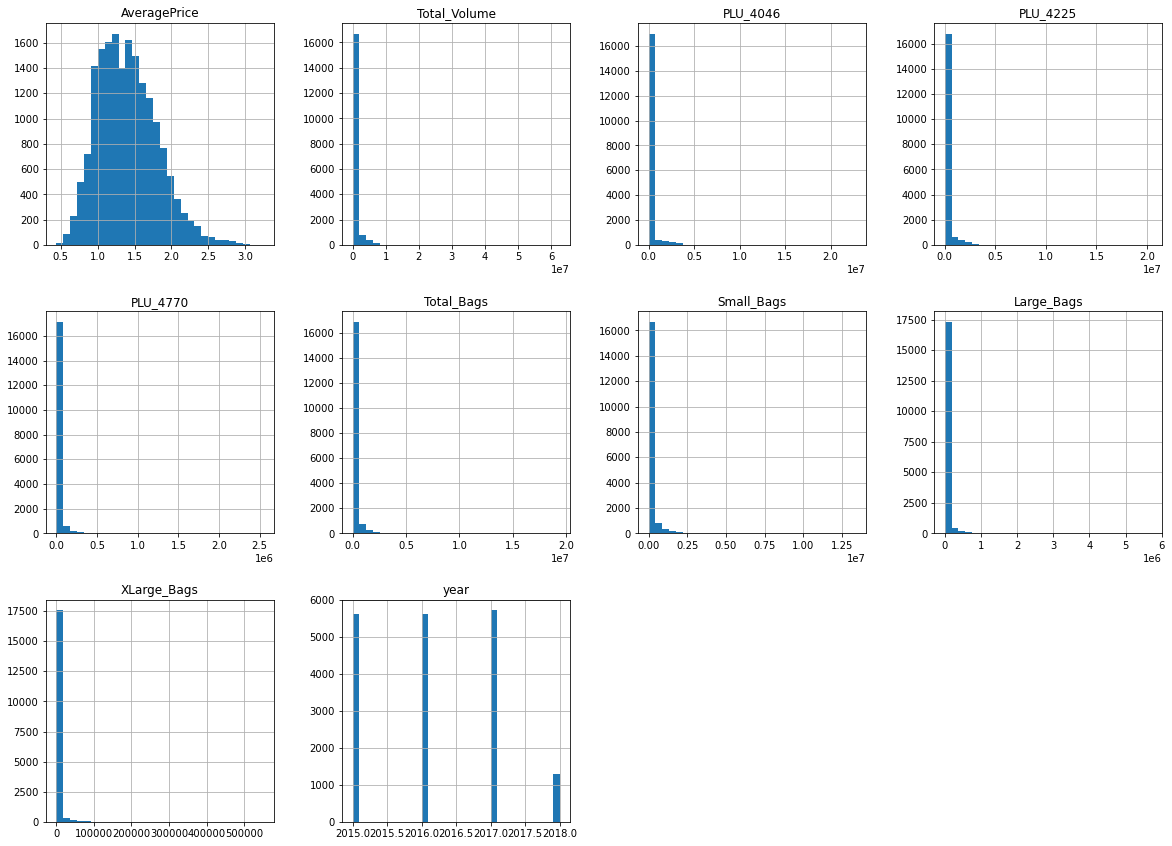

In [11]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Fr

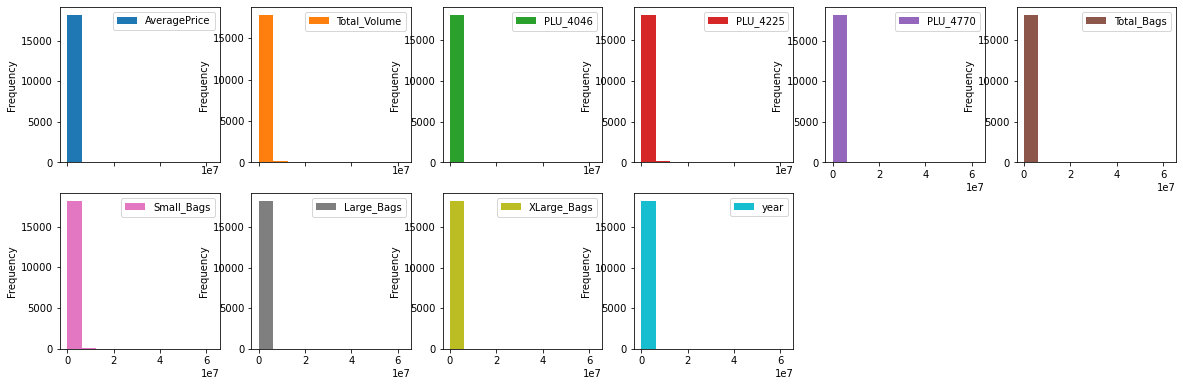

In [12]:
df.plot(kind="hist",subplots=True,layout=(6,6),figsize=(20,20))

<AxesSubplot:>

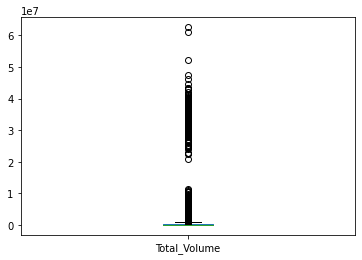

In [13]:
#Spotting Outliers
df["Total_Volume"].plot.box()

<AxesSubplot:>

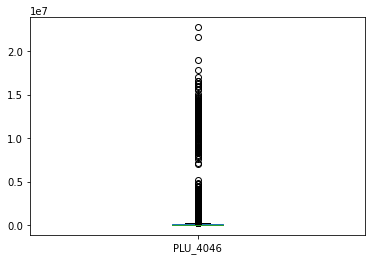

In [14]:
df["PLU_4046"].plot.box()

<AxesSubplot:>

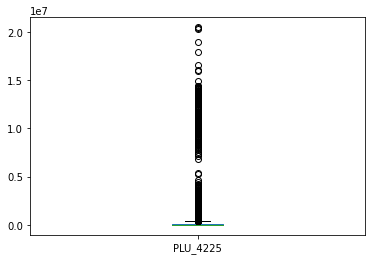

In [15]:
df["PLU_4225"].plot.box()

<AxesSubplot:>

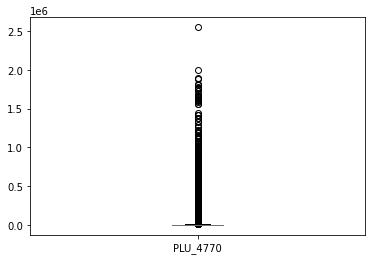

In [16]:
df["PLU_4770"].plot.box()

<AxesSubplot:>

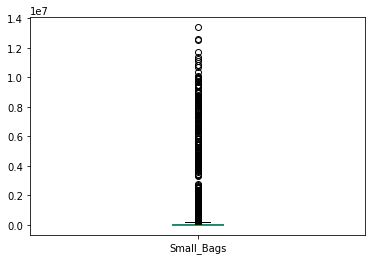

In [17]:
df["Small_Bags"].plot.box()

<AxesSubplot:>

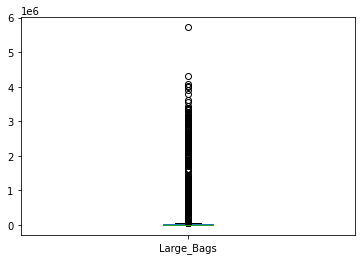

In [18]:
df["Large_Bags"].plot.box()

<AxesSubplot:>

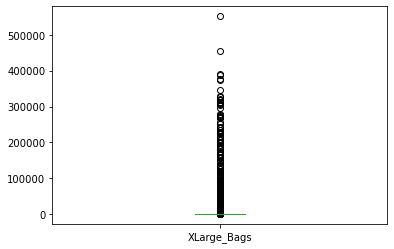

In [19]:
df["XLarge_Bags"].plot.box()

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total_Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
PLU_4046        AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
PLU_4225        AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
PLU_4770        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total_Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small_Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large_Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge_Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
year               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
dtype: object

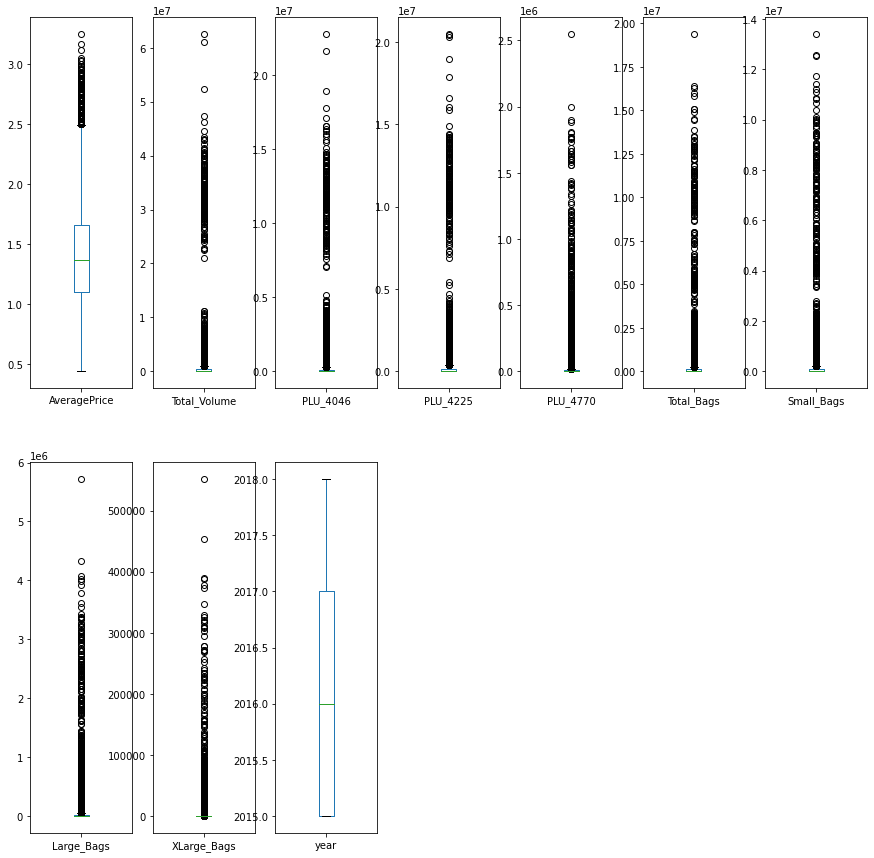

In [20]:
df.plot(kind="box",subplots=True,layout=(2,7),figsize=(15,15))

As we can see there are  lot of data columns which ae having outliers

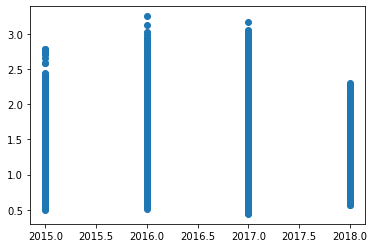

In [21]:
plt.scatter(df["year"],df["AveragePrice"])
plt.show()

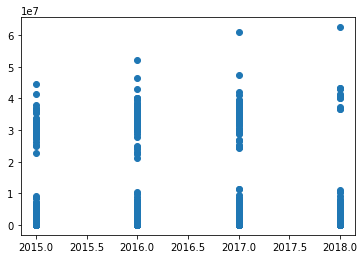

In [22]:
plt.scatter(df["year"],df["Total_Volume"])
plt.show()

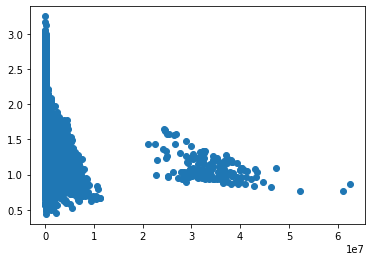

In [23]:
plt.scatter(df["Total_Volume"],df["AveragePrice"])
plt.show()

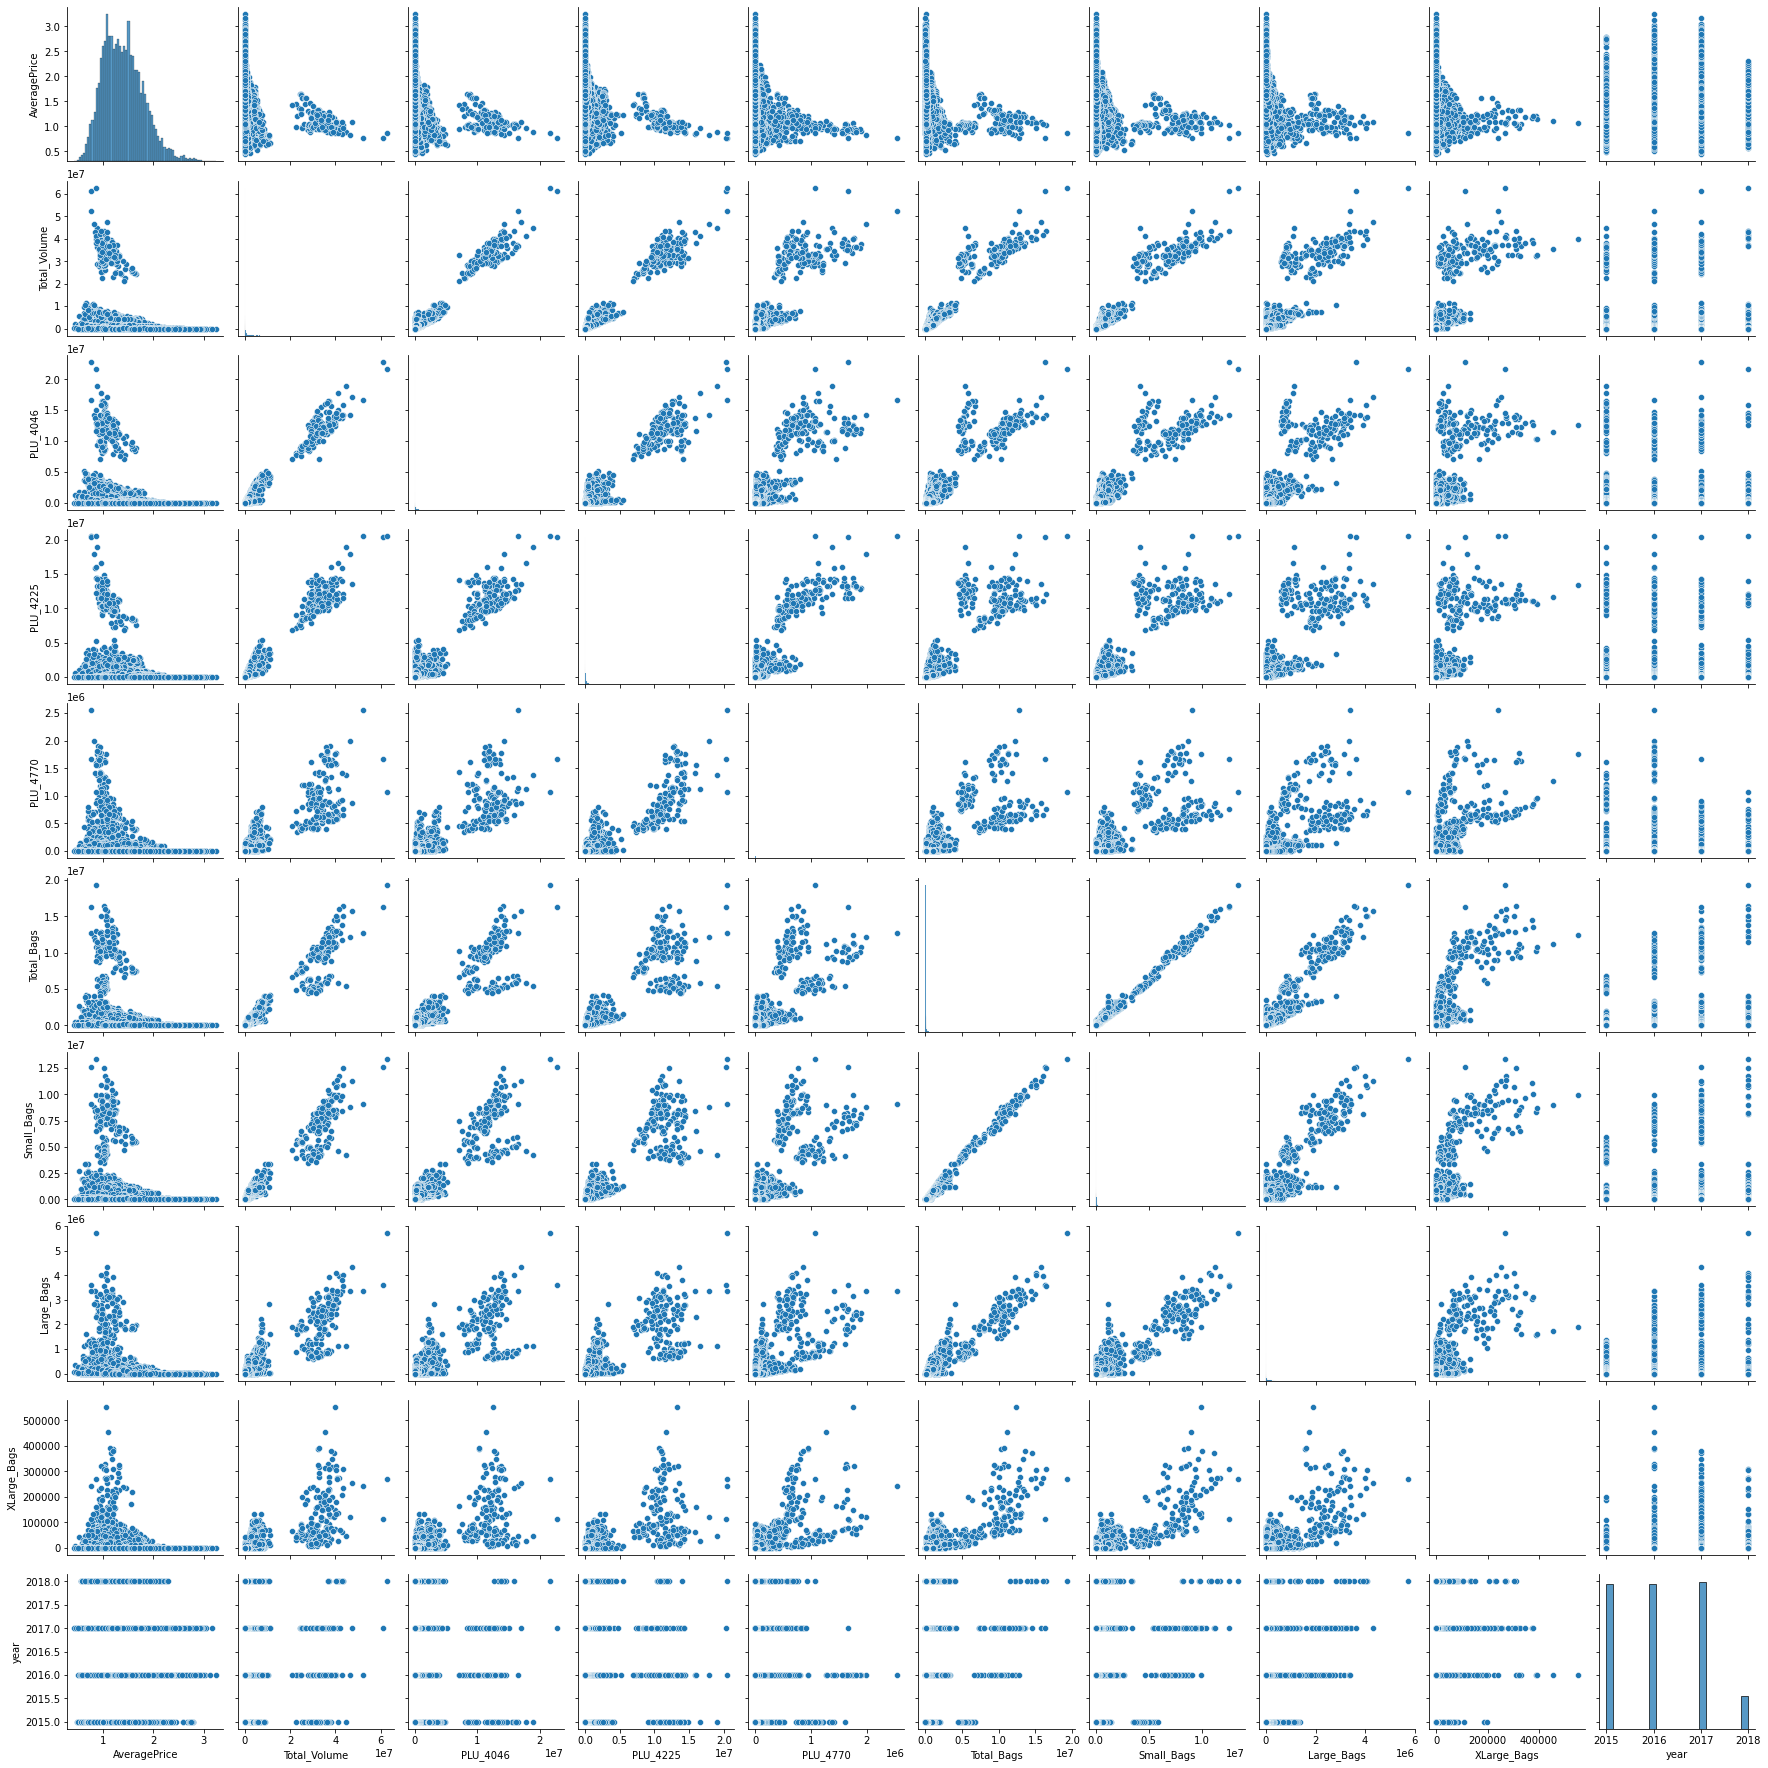

In [24]:
sns.pairplot(df)

In [25]:
#Checking Correlation between the different data
df.corr()

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total_Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
PLU_4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
PLU_4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
PLU_4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total_Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small_Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large_Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge_Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


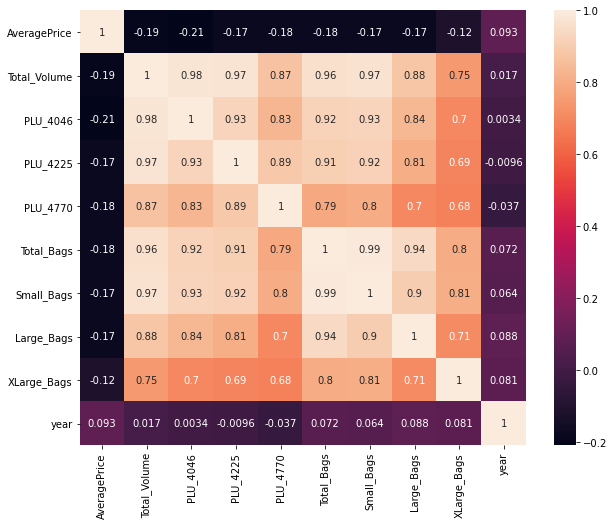

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

we can see that the average price is reflecting a negative correlation with almost all the columns

In [27]:
#Coverting object data in float/Integer by using label Encoding  
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"].astype(str))
df["region"]=le.fit_transform(df["region"].astype(str))

In [28]:
#Spotting Skewness
df.skew()

AveragePrice     0.580303
Total_Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total_Bags       9.756072
Small_Bags       9.540660
Large_Bags       9.796455
XLarge_Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

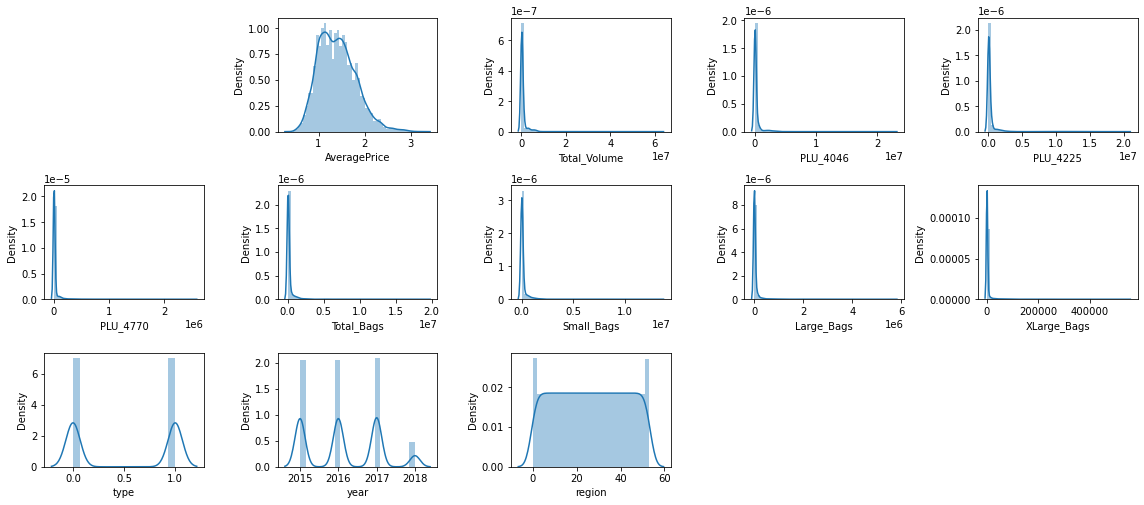

In [29]:
collist=df.columns.values
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

We can see that there is huge skewness in most of the columns. so lets remove this first for the further processing and analysis

In [30]:
import numpy as np
skew=("Total_Volume","PLU_4046","PLU_4225","PLU_4770","Total_Bags","Small_Bags","Large_Bags","XLarge_Bags")
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [31]:
df.skew()

AveragePrice    0.580303
Total_Volume    0.088098
PLU_4046       -0.328195
PLU_4225       -0.486654
PLU_4770        0.099986
Total_Bags     -0.218874
Small_Bags     -0.622148
Large_Bags     -0.547765
XLarge_Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
dtype: float64

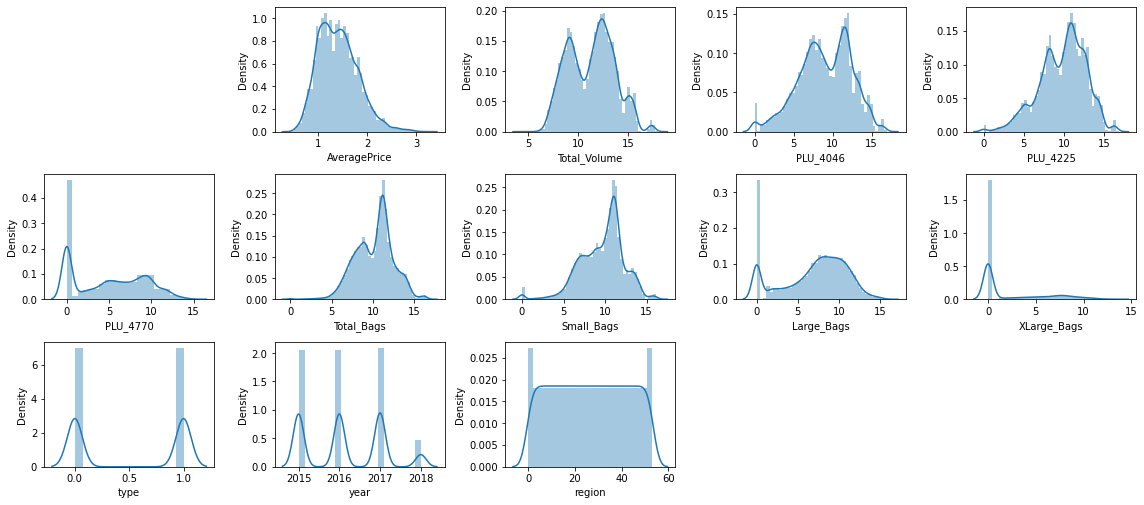

In [32]:
collist=df.columns.values
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

In [33]:
df.dtypes

Date             object
AveragePrice    float64
Total_Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge_Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [34]:
#lets drop date columns 
df.drop("Date",axis=1,inplace=True)

In [35]:
df

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53


In [36]:
#Identifying outliers and removing them 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.18868864, 0.10728205, 0.60975177, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.13901962, 0.1759487 , 0.73770703, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.18206895, 0.15869039, 0.68884013, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.15237477, 0.77890112, 0.56825116, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.30138182, 0.70779758, 0.49440715, ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.53151208, 0.67454176, 0.30415101, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [37]:
threshold=3
print(np.where(z>3))

(array([ 5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
        9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
        9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
        9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
       10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
       10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
       10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
       11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022,
       11023, 11024, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
       11031, 11032, 11033, 11034, 11035, 11036, 11037, 11039, 11040,
       11041, 11042, 11314, 11316, 11318, 11319, 11320, 11320, 11320,
       11321, 11321, 11321, 11322, 11323, 11324, 11324, 11325, 11325,
       11325, 11326, 11326, 11327, 11327, 11328, 11329, 11329, 11330,
       11330, 11331, 11331, 11332, 11332, 11333, 11333, 11334, 11335,
       11336, 11337

In [38]:
df_new=df[(z<3).all(axis=1)]

In [39]:
df_new

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53


In [40]:
df_new.shape

(17834, 12)

In [41]:
df.shape

(18249, 12)

In [42]:
df_new.shape

(17834, 12)

Lets now fsit find out the prediction of the average price by using different regresssion models

In [43]:
x=df_new.iloc[:,1:30]
x.head()

,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0


In [44]:
y=df_new.iloc[:,0]
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [45]:
x.shape

(17834, 11)

In [46]:
y.shape

(17834,)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [48]:
x_train.shape

(11948, 11)

In [49]:
x_test.shape

(5886, 11)

In [50]:
y_train.shape

(11948,)

In [51]:
y_test.shape

(5886,)

In [52]:
lm=LinearRegression()

In [53]:
lm.fit(x_train,y_train)

LinearRegression()

In [54]:
lm.coef_

array([-0.13291877,  0.00301041,  0.0859594 ,  0.00434295, -0.11959744,
        0.10593973, -0.00906863,  0.00694693,  0.37769608,  0.07369844,
        0.00082813])

In [55]:
lm.intercept_

-146.5551975354379

In [56]:
lm.score(x_train,y_train)

0.5375918294163642

In [57]:
pred=lm.predict(x_test)
print("predict result price",pred)
print("actual price",y_test)

predict result price [1.83607669 1.76919435 1.20893596 ... 1.61965032 1.2127798  1.50682638]
actual price 15119    2.15
13746    1.38
290      1.40
1570     1.00
8666     1.18
         ... 
3795     0.78
16671    2.29
12579    1.47
15725    1.11
15326    1.41
Name: AveragePrice, Length: 5886, dtype: float64


In [58]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("men squared error:",mean_squared_error(y_test,pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.2055576047106783
men squared error: 0.06832873075373327
root mean squared error: 0.2613976487150052


In [59]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5417838194228672


0.537589264160616
[-0.13213926  0.00281601  0.08562676  0.00428575 -0.11915346  0.10533674
 -0.00912898  0.00690827  0.37636411  0.07357458  0.00083241]


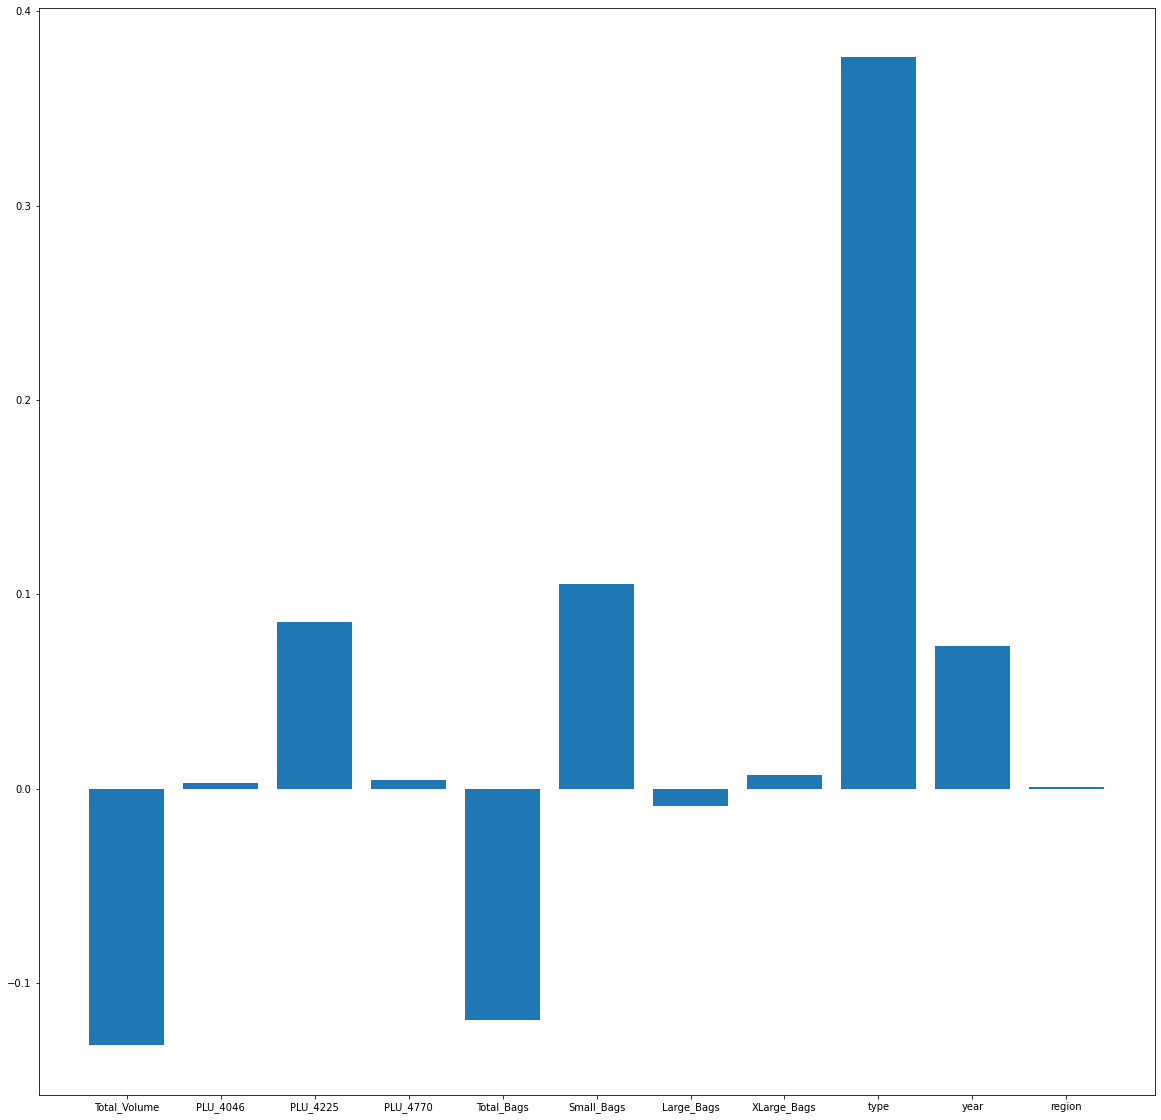

In [60]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print(ls.coef_)
plt.figure(figsize=(20,20))
plt.bar(x.columns,ls.coef_)
plt.show()

In [61]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.53759089877637


array([-0.13251329,  0.00290355,  0.08577661,  0.00430561, -0.11933339,
        0.10559573, -0.00910393,  0.00692257,  0.37678599,  0.07363529,
        0.00083094])

0.5375918294163636
[-0.13291877  0.00301041  0.08595939  0.00434295 -0.11959744  0.10593972
 -0.00906863  0.00694692  0.37769604  0.07369844  0.00082813]


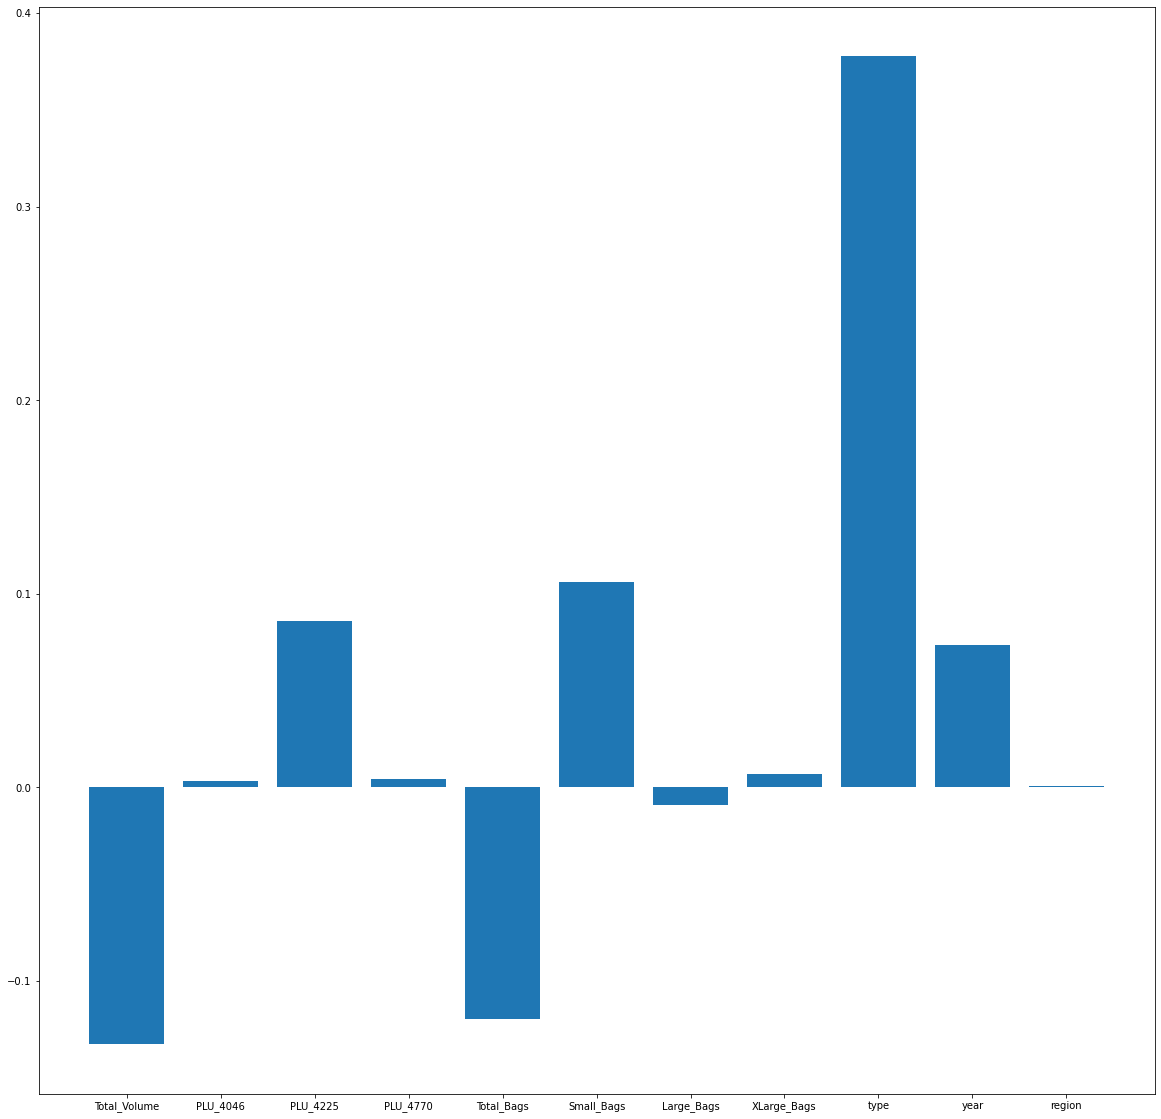

In [62]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
print(rd.coef_)
plt.figure(figsize=(20,20))
plt.bar(x.columns,rd.coef_)
plt.show() 

In [63]:
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.svm import SVR

In [65]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print("DTC SCORE:",dtc.score(x_train,y_train))

dtcpredict=dtc.predict(x_test)
print("dtc r2_score:",r2_score(y_test,dtcpredict))
print("mean squared error of DTC:",mean_squared_error(y_test,dtcpredict))
print("root mean squared error of DTC:",np.sqrt(mean_squared_error(y_test,dtcpredict)))

DTC SCORE: 1.0
dtc r2_score: 0.6701022312418106
mean squared error of DTC: 0.04919401970778117
root mean squared error of DTC: 0.22179724909876852


In [66]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR SCORE:",knr.score(x_train,y_train))

knrpredict=knr.predict(x_test)
print("knr r2_score:",r2_score(y_test,knrpredict))
print("mean squared error of KNN:",mean_squared_error(y_test,knrpredict))
print("root mean squared error of KNN:",np.sqrt(mean_squared_error(y_test,knrpredict)))

KNR SCORE: 0.8865675781008733
knr r2_score: 0.8212860447448651
mean squared error of KNN: 0.026649643221202855
root mean squared error of KNN: 0.16324718442044522


In [67]:
svr1=SVR()
svr1.fit(x_train,y_train)
print("SVR1 SCORE:",svr1.score(x_train,y_train))

svr1predict=svr1.predict(x_test)
print("SVR r2_score:",r2_score(y_test,svr1predict))
print("mean squared error of SVR:",mean_squared_error(y_test,svr1predict))
print("root mean squared error of SVR:",np.sqrt(mean_squared_error(y_test,svr1predict)))

SVR1 SCORE: 0.24644566590916916
SVR r2_score: 0.24403231266697978
mean squared error of SVR: 0.11272913257065843
root mean squared error of SVR: 0.3357515935489487


In [68]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(predrf)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predrf))

[1.8346 1.4211 1.3991 ... 1.3334 0.9405 1.5386]
rf score: 0.9774296909499653
rf r2 score: 0.8352299387688629


In [69]:
from sklearn.ensemble import AdaBoostRegressor
#AdaBoostRegressor(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostRegressor(n_estimators=50,random_state=42)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(predad)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predad))

[1.84751989 1.71968114 1.28348997 ... 1.66761413 1.50850952 1.62537851]
rf score: 0.9774296909499653
rf r2 score: 0.48960734721204835


In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(predgb)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predgb))

[1.84920637 1.63436174 1.29158651 ... 1.51994661 1.15830034 1.57699594]
rf score: 0.9774296909499653
rf r2 score: 0.6825401143372307


from the above analysis we can see that the KNN regressor is providing the best r2 score.hence we will be selecting the same for further predictions   

Text(0, 0.5, 'predict_y')

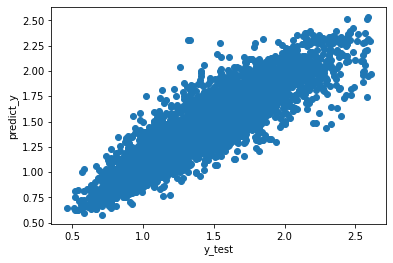

In [71]:
plt.scatter(x=y_test,y=knrpredict)
plt.xlabel("y_test")
plt.ylabel("predict_y")

In [72]:
import pickle
filename='avacadoPricePrediction.pkl'
pickle.dump(knr,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([1.962, 1.448, 1.408, ..., 1.342, 0.954, 1.318])

Lets now find out the prediction to find the region  by using different classification models

In [73]:
df_new.shape

(17834, 12)

In [74]:
df_new

,AveragePrice,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53


In [75]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [76]:
x.shape

(17834, 11)

In [77]:
y.shape

(17834,)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [79]:
LG=LogisticRegression()

In [80]:
LG.fit(x_train,y_train)

LogisticRegression()

In [81]:
LG.fit(x_train,y_train)
LG.score(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))

0.1984675761539899
[[14  0  1 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ... 51 16  0]
 [ 0  3  0 ... 53  3  0]
 [ 1  4  3 ...  0  5  1]]
              precision    recall  f1-score   support

           0       0.14      0.13      0.13       109
           1       0.11      0.22      0.14        83
           2       0.12      0.17      0.14       102
           3       0.02      0.01      0.01        90
           4       0.17      0.23      0.19       101
           5       0.07      0.02      0.03       105
           6       0.40      0.48      0.44       105
           7       0.33      0.38      0.35       112
           8       0.35      0.44      0.39       103
           9       0.29      0.39      0.33       111
          10       0.37      0.14      0.21       111
          11       0.32      0.17      0.22       108
          12       0.10      0.20      0.14        96
          13       0.14      0.27      0.18        89
          14  

In [82]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.022986357690151372
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00       101
           5       0.00      0.00      0.00       105
           6       0.00      0.00      0.00       105
           7       0.00      0.00      0.00       112
           8       0.00      0.00      0.00       103
           9       0.00      0.00      0.00       111
          10       0.00      0.00      0.00       111
          11       0.00      0.00      0.00       108
          12       0.00      0.00      0.00        96
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00     

In [83]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.022986357690151372
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00       101
           5       0.00      0.00      0.00       105
           6       0.00      0.00      0.00       105
           7       0.00      0.00      0.00       112
           8       0.00      0.00      0.00       103
           9       0.00      0.00      0.00       111
          10       0.00      0.00      0.00       111
          11       0.00      0.00      0.00       108
          12       0.00      0.00      0.00        96
          13       0.00      0.00      0.00        89
          14       0.00      0.00      0.00     

In [84]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7882638759110446
[[74  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  0 86  0]
 [ 0  1  2 ...  0  0 62]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       109
           1       0.59      0.70      0.64        83
           2       0.88      0.90      0.89       102
           3       0.78      0.77      0.77        90
           4       0.83      0.86      0.84       101
           5       0.76      0.64      0.69       105
           6       0.97      0.90      0.93       105
           7       0.82      0.86      0.84       112
           8       0.92      0.88      0.90       103
           9       0.75      0.81      0.78       111
          10       0.74      0.68      0.70       111
          11       0.85      0.86      0.86       108
          12       0.85      0.80      0.82        96
          13       0.74      0.72      0.73        89
          14  

In [85]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8461969725284993
[[93  0  0 ...  0  0  0]
 [ 0 72  0 ...  0  0  0]
 [ 0  0 98 ...  0  0  0]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  0 91  0]
 [ 0  2  3 ...  0  0 63]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       109
           1       0.65      0.87      0.75        83
           2       0.88      0.96      0.92       102
           3       0.79      0.76      0.77        90
           4       0.91      0.89      0.90       101
           5       0.85      0.71      0.78       105
           6       0.96      0.96      0.96       105
           7       0.85      0.91      0.88       112
           8       0.92      0.95      0.94       103
           9       0.85      0.80      0.82       111
          10       0.77      0.77      0.77       111
          11       0.89      0.93      0.91       108
          12       0.91      0.94      0.92        96
          13       0.74      0.78      0.76        89
          14  

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.903008783404971
[[99  0  0 ...  0  0  0]
 [ 0 75  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  0 93  0]
 [ 0  1  2 ...  0  0 76]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       109
           1       0.77      0.90      0.83        83
           2       0.93      0.97      0.95       102
           3       0.93      0.79      0.86        90
           4       0.93      0.95      0.94       101
           5       0.94      0.81      0.87       105
           6       0.97      0.96      0.97       105
           7       0.91      0.94      0.92       112
           8       0.95      0.96      0.96       103
           9       0.91      0.88      0.89       111
          10       0.88      0.83      0.85       111
          11       0.95      0.96      0.96       108
          12       0.92      0.97      0.94        96
          13       0.83      0.84      0.84        89
          14   

In [87]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.05980190618575967
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00        90
           4       0.22      0.23      0.22       101
           5       0.00      0.00      0.00       105
           6       0.00      0.00      0.00       105
           7       0.00      0.00      0.00       112
           8       0.00      0.00      0.00       103
           9       0.00      0.00      0.00       111
          10       0.00      0.00      0.00       111
          11       0.00      0.00      0.00       108
          12       0.00      0.00      0.00        96
          13       0.03      0.98      0.06        89
          14       0.00      0.00      0.00      

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8389086152121099
[[90  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  0]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  0 88  0]
 [ 0  0  3 ...  0  0 73]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       109
           1       0.66      0.81      0.72        83
           2       0.90      0.93      0.91       102
           3       0.88      0.78      0.82        90
           4       0.89      0.84      0.87       101
           5       0.80      0.80      0.80       105
           6       0.96      0.93      0.95       105
           7       0.86      0.87      0.86       112
           8       0.93      0.91      0.92       103
           9       0.86      0.86      0.86       111
          10       0.74      0.77      0.76       111
          11       0.88      0.83      0.86       108
          12       0.87      0.91      0.89        96
          13       0.83      0.76      0.80        89
          14  

In [89]:
score=cross_val_score(KNN,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.58284272 0.65853659 0.70255116 0.61984861 0.47083567]
0.6069229512570911
0.07883577901257878


In [90]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.47743202 0.69245865 0.6691898  0.56181665 0.42933259]
0.5660459395898811
0.10313067784573347


In [91]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.63779086 0.81469022 0.77039529 0.68320718 0.48878295]
0.6789732987356369
0.1137218974178063


now validating all the models we can see that the RandomForestClassifier model is giving the best results. it is giving us 90% accuracy with the cross vadliating score of mean score 68% nd the standard deviation 11%

# Creating AUC-ROC Curve

In [92]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [93]:
y_pred_prob=rf.predict_proba(x_test)[:,-1]

In [94]:
y_pred_prob

array([0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.  ])

In [95]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=True)

In [96]:
print(fpr)

[0.00000000e+00 5.69476082e-04 7.59301443e-04 1.89825361e-03
 2.27790433e-03 2.46772969e-03 3.22703113e-03 3.41685649e-03
 4.17615793e-03 4.36598330e-03 4.74563402e-03 4.93545938e-03
 5.50493546e-03 5.88458618e-03 6.45406226e-03 7.02353834e-03
 7.40318907e-03 7.78283979e-03 8.16249051e-03 9.30144267e-03
 9.49126803e-03 1.02505695e-02 1.04403948e-02 1.08200456e-02
 1.15793470e-02 1.17691724e-02 1.23386484e-02 1.27182992e-02
 1.30979499e-02 1.36674260e-02 1.40470767e-02 1.46165528e-02
 1.49962035e-02 1.51860289e-02 1.55656796e-02 1.59453303e-02
 1.63249810e-02 1.78435839e-02 1.89825361e-02 1.93621868e-02
 2.01214882e-02 2.14502658e-02 2.33485194e-02 2.48671222e-02
 2.65755505e-02 2.79043280e-02 2.86636295e-02 2.96127563e-02
 3.17008352e-02 3.34092635e-02 3.58769932e-02 3.85345482e-02
 4.10022779e-02 4.46089598e-02 4.91647684e-02 5.52391800e-02
 6.28321944e-02 7.61199696e-02 9.24449506e-02 1.19210326e-01
 1.76347760e-01 1.00000000e+00]


In [97]:
fpr

array([0.00000000e+00, 5.69476082e-04, 7.59301443e-04, 1.89825361e-03,
       2.27790433e-03, 2.46772969e-03, 3.22703113e-03, 3.41685649e-03,
       4.17615793e-03, 4.36598330e-03, 4.74563402e-03, 4.93545938e-03,
       5.50493546e-03, 5.88458618e-03, 6.45406226e-03, 7.02353834e-03,
       7.40318907e-03, 7.78283979e-03, 8.16249051e-03, 9.30144267e-03,
       9.49126803e-03, 1.02505695e-02, 1.04403948e-02, 1.08200456e-02,
       1.15793470e-02, 1.17691724e-02, 1.23386484e-02, 1.27182992e-02,
       1.30979499e-02, 1.36674260e-02, 1.40470767e-02, 1.46165528e-02,
       1.49962035e-02, 1.51860289e-02, 1.55656796e-02, 1.59453303e-02,
       1.63249810e-02, 1.78435839e-02, 1.89825361e-02, 1.93621868e-02,
       2.01214882e-02, 2.14502658e-02, 2.33485194e-02, 2.48671222e-02,
       2.65755505e-02, 2.79043280e-02, 2.86636295e-02, 2.96127563e-02,
       3.17008352e-02, 3.34092635e-02, 3.58769932e-02, 3.85345482e-02,
       4.10022779e-02, 4.46089598e-02, 4.91647684e-02, 5.52391800e-02,
      

In [98]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01204819, 0.01204819,
       0.01204819, 0.01204819, 0.02409639, 0.03614458, 0.03614458,
       0.06024096, 0.08433735, 0.14457831, 0.22891566, 0.3253012 ,
       0.59036145, 1.        ])

In [99]:
thresholds

array([1.99, 0.99, 0.98, 0.97, 0.96, 0.93, 0.9 , 0.89, 0.86, 0.85, 0.84,
       0.83, 0.81, 0.8 , 0.74, 0.73, 0.71, 0.7 , 0.67, 0.64, 0.62, 0.61,
       0.59, 0.58, 0.55, 0.54, 0.52, 0.49, 0.48, 0.44, 0.43, 0.39, 0.37,
       0.36, 0.35, 0.31, 0.3 , 0.27, 0.25, 0.23, 0.22, 0.21, 0.19, 0.18,
       0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.07,
       0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

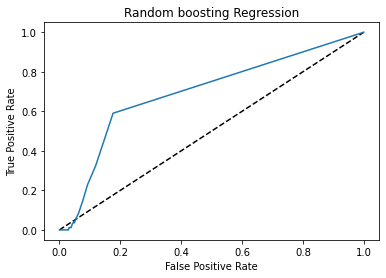

In [100]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Random boosting Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random boosting Regression")
plt.show()

In [101]:
import pickle
filename='avacadoregionPrediction.pkl'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([ 7, 34,  5, ..., 35, 52, 25])